# ARMA Models - https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/master/_notebooks/2020-06-15-01-ARMA-Models.ipynb
> Dive straight in and learn about the most important properties of time series. You'll learn about stationarity and how this is important for ARMA models. You'll learn how to test for stationarity by eye and with a standard statistical test. Finally, you'll learn the basic structure of ARMA models and use this to generate some ARMA data and fit an ARMA model. This is the Summary of lecture "ARIMA Models in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time-Series Analysis]
- image: images/train_test.png

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Intro to time series and stationarity


### Exploration
In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series. You probably do this all the time, but this is just a refresher.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

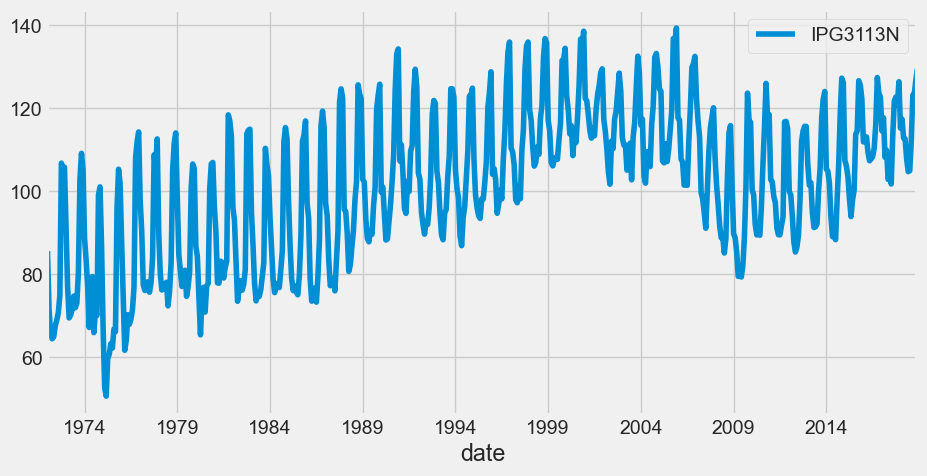

In [9]:
# Load in the time series
candy = pd.read_csv('./dataset/candy_production.csv', index_col='date', parse_dates=True)

# Plot ant show the time series on axis ax
fig, ax = plt.subplots();
candy.plot(ax=ax);

### Train-test splits
In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

FileNotFoundError: [Errno 2] No such file or directory: '../images/train_test.png'

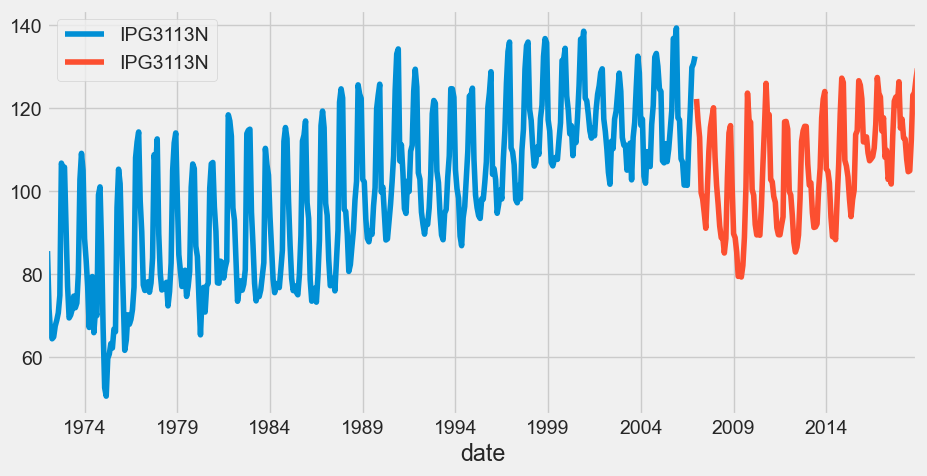

In [10]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots();

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax);
candy_test.plot(ax=ax);
plt.savefig('../images/train_test.png')

### Is it stationary
Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

## Making time series stationary
- The augmented Dicky-Fuller test
    - Tests for non-stationary
    - Null hypothesis is time series is non-stationary

### Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!



In [ ]:
earthquake = pd.read_csv('./dataset/earthquakes.csv', index_col='date', parse_dates=True)
earthquake.drop(['Year'], axis=1, inplace=True)

In [ ]:
earthquake

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

### Taking the difference
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

In [ ]:
city = pd.read_csv('./dataset/city.csv', parse_dates=True, index_col='date')

In [ ]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots();
city.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [ ]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots();
city_stationary.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [ ]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots();
city_stationary.plot(ax=ax);

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

### Other tranforms
Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:
$$ \log\text{_return} (y_t) = \log \big(\frac{y_t}{y_{t-1}}\big)$$

You can calculate the log-return of this DataFrame by substituting:

$y_t$ → amazon

$y_{t-1}$ → amazon.shift(1)

$\log()$ → ```np.log()```

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [ ]:
amazon = pd.read_csv('./dataset/amazon_close.csv', index_col='date', parse_dates=True)
amazon.head()

In [ ]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

In [ ]:
# Calculate the log-return and drop nans
amazon_log = np.log(amazon.div(amazon.shift(1)))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

## Intro to AR, MA and ARMA models
- AR models
    - Autoregressive (AR) model
        - AR(1) model:
$$ y_t = a_1 y_{t-1} + \epsilon_t $$
        - AR(2) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + \epsilon_t $$
        - AR(p) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + \cdots + a_p y_{t-p} + \epsilon_t $$
- MA models
    - Moving Average (MA) model
        - MA(1) model:
$$ y_t = m_1 \epsilon_{t-1} + \epsilon_t $$
        - MA(2) model:
$$ y_t = m_1 \epsilon_{t-1} + m_2 \epsilon_{t-2} + \epsilon_t $$
        - MA(q) model:
$$ y_t = m_1 \epsilon_{t-1} + m_2 \epsilon_{t-2} + \cdots + m_q \epsilon_{t-q} + \epsilon_t $$ 
- ARMA models
    - Autoregressive moving-average (ARMA) model
    - ARMA = AR + MA
        - ARMA(1, 1) model:
$$ y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} + \epsilon_t $$
        - ARMA(p, q) model:
            - p is order of AR part
            - q is order of MA part

### Model order
When fitting and working with AR, MA and ARMA models it is very important to understand the model order. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

In [ ]:
ar_coefs = [1, 0.4, -0.1]
ma_coefs = [1, 0.2]

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y);

### Generating ARMA data
In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the ```arma_generate_sample()``` function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q):

- The list ar_coefs has the form $[1, -a_1, -a_2, ..., -a_p]$.
- The list ma_coefs has the form $[1, m_1, m_2, ..., m_q]$,

where $a_i$ are the lag-i AR coefficients and $m_j$ are the lag-j MA coefficients.

In [ ]:
np.random.seed(1)

#### MA(1) model with MA lag coefficient of -0.7

In [ ]:
# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y);
plt.ylabel(r'$y_t$');
plt.xlabel(r'$t$');

#### AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2

In [ ]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y);
plt.ylabel(r'$y_t$');
plt.xlabel(r'$t$');

#### ARMA model with $y_t = -0.2 y_{t-1} + 0.3 \epsilon_{t-1} + 0.4 \epsilon_{t-2} + \epsilon_t$

In [ ]:
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y);
plt.ylabel(r'$y_t$');
plt.xlabel(r'$t$');

### Fitting Prelude
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [ ]:
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1, 1))

# Fit the model
results = model.fit()